In [ ]:
# Plot of final semi-major axis, a_f as a function of the initial semi-major axis, a_i of the PBH-binary with
# dark matter halo's density profile of ρ(r)∝ r^{-3/2}. 



import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math



yr=3.154e7
π=np.pi
c=3e8                  #in units of m s^-1
t_eq=1.59246e12        # in units of seconds
ρ_eq=2.15368e-16       # in units of kg.m^-3
G=6.67e-11             # in units of m^3.kg^-1.s^-2          
a_eq=2.9374e-4         # scale factor corresponding to matter radiation equlaity
t_i=13.78e9*yr         # in seconds
M_solar=1.989e30       # in units of kg


M_1PBH=10*M_solar     # in units of kg
M_2PBH=10*M_solar      # in units of kg


λ_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,
        1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,
        3.4,3.5,3.6,3.7,3.8,3.9,4.0]



 

        
def ρ_bar(M_PBH):
    return ((3/(8*π))*M_PBH*((2*G*M_PBH*(t_eq**(2)))**(-1/2)))
        
def t(s):
    return ((math.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s-2)*math.sqrt(s+1))+(4/3)))

def M_halo(M_PBH,s):               
    return (((8*π)/3)*ρ_bar(M_PBH)*math.sqrt(2*G*M_PBH*(t(s)**2)))


def h(s):
    return math.sqrt((s**-3)+(s**-4))   
def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(x)=h'(x).

def f(s):
    return (1/(1+((M_halo(M_1PBH,s)+M_halo(M_2PBH,s))/(M_1PBH+M_2PBH))))
                   
def λ(s):
    return λ_0*f(s)
   

    
def s_dec(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        S=As[i]
        if Δ<0:
            s=(λ_0*S)
            break
        
    return s




s_dec_list=np.zeros(len(λ_list))
M_halo_1i_list = np.zeros(len(λ_list))
M_halo_2i_list = np.zeros(len(λ_list))




for i, λ_0 in enumerate (λ_list):
    s_dec_list[i]= s_dec(λ_0)
    
for i,s in enumerate(s_dec_list):
    M_halo_1i_list[i]=M_halo(M_1PBH,s)
    
for i,s in enumerate(s_dec_list):
    M_halo_2i_list[i]=M_halo(M_2PBH,s) 



def a(λ_0):   #Function to calculate the initial semi-major axis of the PBH binary
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        a=(((A/2)*λ_0))                   #as Bs=separations/λ_0.
        if Δ<0:
            x=(((3*(M_1PBH+M_2PBH)*λ_0)/(8*π*ρ_eq))**(1/3)) #Comoving separation of the PBH binary.s
            semi=(x*a)
            break
    
    
    return semi




a_i_1_list=np.zeros(len(λ_list))
for i, λ_0 in enumerate (λ_list):
    a_i_1_list[i] = a(λ_0)
    



def M_(M_PBH,M_halo):
    return (M_PBH + M_halo)
            

    
M_1i_list=np.zeros(len(λ_list))
M_2i_list=np.zeros(len(λ_list))

for i, M_halo in enumerate (M_halo_1i_list):
    M_1i_list[i] = M_(M_1PBH,M_halo)
    
for i, M_halo in enumerate (M_halo_2i_list):
    M_2i_list[i]=M_(M_2PBH,M_halo)



def j_i(M_1i,M_2i,a_i):
    return  ((((85/3)*(G**3)*M_1i*M_2i*(M_1i+M_2i)*t_i)/((a_i**4)*(c**5)))**(1/7))

j_i_list=np.zeros(len(λ_list))


for k, (M_1i,M_2i,a_i) in enumerate (zip(M_1i_list,M_2i_list,a_i_1_list)):
    j_i_list[k]=j_i(M_1i,M_2i,a_i)
    




def e_i(j_i):
    return ((1-(j_i**2))**(1/2))

e_i_list=np.zeros(len(λ_list))

for k, j_i in enumerate(j_i_list):
    e_i_list[k]=e_i(j_i)
    




def r_min(e_i,a_i): #r_min of the PBH binary orbit
    return (a_i*(1-e_i)) 

r_min_list=np.zeros(len(λ_list))
for k, (e_i,a_i) in enumerate (zip(e_i_list,a_i_1_list)):
     r_min_list[k]=r_min(e_i,a_i)






def r_ta(M_PBH,s): #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible".
    return ((2*G*M_PBH*(t(s)**2))**(1/3))

r_ta_1_list=np.zeros(len(λ_list))
r_ta_2_list=np.zeros(len(λ_list))

for j, s in enumerate (s_dec_list):
    r_ta_1_list[j]=r_ta(M_1PBH,s)
    r_ta_2_list[j]=r_ta(M_2PBH,s)


    
    


def E_b(M_PBH,r_ta,r_min):
    return -((8*π*G*ρ_bar(M_PBH)*M_PBH*(((r_ta)**(1/2))-((r_min/2)**(1/2))))+((16/3)*G*(π**2)*(ρ_bar(M_PBH)**2)*(((r_ta)**(2))-((r_min/2)**(2)))))



E_b_1halo_list=np.zeros(len(λ_list))
E_b_2halo_list=np.zeros(len(λ_list))

for i, (r_ta,r_min) in enumerate (zip(r_ta_1_list,r_min_list)):
    E_b_1halo_list[i] = E_b(M_1PBH,r_ta,r_min)
for i, (r_ta,r_min) in enumerate (zip(r_ta_2_list,r_min_list)):
    E_b_2halo_list[i] = E_b(M_2PBH,r_ta,r_min)

    
    


def M_halo(M_PBH,r): #Mass of the dark matter halos of size r<r_ta
    return ((8/3)*π*ρ_bar(M_PBH)*((r/2)**(3/2)))

M_halo_1f_list=np.zeros(len(λ_list))
M_halo_2f_list=np.zeros(len(λ_list))


for i, r in enumerate (r_min_list):
    M_halo_1f_list[i] = M_halo(M_1PBH,r)
    
for i, r in enumerate (r_min_list):
    M_halo_2f_list[i] = M_halo(M_2PBH,r)
    


M_1f_list=np.zeros(len(λ_list))
M_2f_list=np.zeros(len(λ_list))

for i, M_halo in enumerate (M_halo_1f_list):
    M_1f_list[i] =  M_(M_1PBH,M_halo)
    
for i, M_halo in enumerate (M_halo_2f_list):
    M_2f_list[i] =  M_(M_2PBH,M_halo)
    
    
def a_f(a_i,M_1i,M_2i,M_1f,M_2f,E_b_1halo,E_b_2halo): #Final semi-major axis
    return ((G*M_1f*M_2f*a_i)/((G*M_1i*M_2i)-(2*a_i*(E_b_1halo+E_b_2halo))))


a_f_1_list=np.zeros(len(λ_list))

for i, (a_i,M_1i,M_2i,M_1f,M_2f,E_b_1halo,E_b_2halo) in enumerate (zip(a_i_1_list,M_1i_list,M_2i_list,M_1f_list,M_2f_list,E_b_1halo_list,E_b_2halo_list)):
    a_f_1_list[i]=a_f(a_i,M_1i,M_2i,M_1f,M_2f,E_b_1halo,E_b_2halo)
    

print("a_i_1=",a_i_1_list)
print("a_f_1=",a_f_1_list)
print("E_b_1halo_list=",E_b_1halo_list)


plt.figure(figsize=(7,5))
plt.rc('lines', linewidth=2.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.loglog(a_i_1_list,a_f_1_list,'b')
plt.xlabel("$a_{i}\hspace{3} [m]$",fontsize=15)
plt.ylabel("$a_{f}\hspace{3} [m]$",fontsize=15)
plt.savefig('a_f vs a_i.pdf')
plt.title('Variation of $a_{f}$ as a function of $a_{i}$')
plt.show()

r_min 2.302142e+09 m


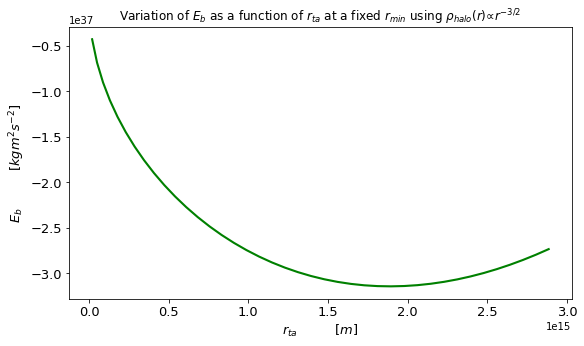

In [8]:
r_min=r_min_list[0]  #Fixed the value of r_min by taking the first element of the r_min_list
print("r_min" ,'%0.6e'%r_min_list[0],"m")


E_b_list=np.zeros(len(r_ta_1_list))


for i, r_ta in enumerate (r_ta_1_list):
    E_b_list[i]=E_b(M_1PBH,r_ta,r_min)
    
    
    
plt.figure(figsize=(9,5))
plt.rc('lines', linewidth=2.1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(r_ta_1_list,E_b_list,'g')
plt.xlabel("$r_{ta}\hspace{3} [m]$",fontsize=13)
plt.ylabel("$E_{b}\hspace{3} [kg m^{2}s^{-2}]$",fontsize=13)
plt.savefig('E_b vs r_ta at fixed r_min.pdf')
plt.title('Variation of $E_{b}$ as a function of $r_{ta}$ at a fixed $r_{min}$ using $ρ_{halo}(r)∝ r^{-3/2}$')
plt.show()

r_ta= 1.989163e+13 m


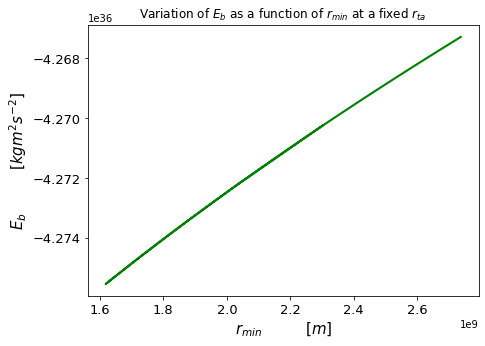

In [7]:
r_ta=r_ta_1_list[0] #Defined the value of r_ta as the first element of the r_ta_1_list
print("r_ta=",'%0.6e'%r_ta_1_list[0],"m")    
   

E_b_list=np.zeros(len(r_min_list))

for i, r_min in enumerate (r_min_list):
    E_b_list[i]=E_b(M_1PBH,r_ta,r_min)
    


plt.figure(figsize=(7,5))
plt.rc('lines', linewidth=2.1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(r_min_list,E_b_list,'g')
plt.xlabel("$r_{min}\hspace{3} [m]$",fontsize=15)
plt.ylabel("$E_{b}\hspace{3} [kg m^{2}s^{-2}]$",fontsize=15)
plt.savefig('E_b vs r_min at fixed r_ta.pdf')
plt.title('Variation of $E_{b}$ as a function of $r_{min}$ at a fixed $r_{ta}$')
plt.show()